# Module 1: Introduction to Visualization Tools

### Intorduction

When creating a visual, always remember:
- Less is more effective
- Less is more attractive
- Less is more impactive

### Matplotlib

Matplotlib Architecture:
- Scripting Layer (pyplot)
- Artist Layer (Artist)
- Backend Layer (FigureCanvas, Renderer, Event)


#### Backend Layer
Three built-in abstract classes:
1. FigureCanvas: <code>matplotlib.backend_bases.FigureCanvas</code>
  - Encompasses the area onto which the figure is drawn
2. Renderer: <code>matplotlib.backend_bases.Renderer</code>
  - Knows how to draw on the figure
3. Event: <code>matplotlib.backend_bases.Event</code>
  - Handles user inputs such as keyboard strokes and mouse clicks

#### Artist Layer

- Comprised of one main object - Artist
   - Knows how to use Renderer to draw on the canvas
- Titles, lines, tick labels, and images, all correspoondes to individual Artist instances

- Two types of Artist objects:
   1. Primitive: Line2D, Rectangle, Circle, and Text.
   2. Composite: Axis, Tick, Axes, and Figure.
   
- Each <i>composite</i> artist may contain other <i>composite</i> Artist as well as <i>primitive</i> artists.

In [3]:
#Histogram of data using Artist Layer

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas #Import FigureCanvas
#agg stands for anti grain geometry which is a high peformance library which produces interactive images
from matplotlib.figure import Figure #import Figure artist
fig = Figure()
canvas = FigureCanvas(fig)

#creating 10000 random numbers
import numpy as np
x = np.random.randn(10000)

ax = fig.add_subplot(111) #create an axes artist
# 111 -> creats a grid with 1 row, 1 column

ax.hist(x, 100) # creates 100 bins histogram
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')
fig.savefig('matplotlib_histogram.png')

#### Scripting Layer
Developed for scientist having no programming layer. It is the <code>matplotlib.pyplot</code> interface


In [4]:
# Generating histogram using pyplot

import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

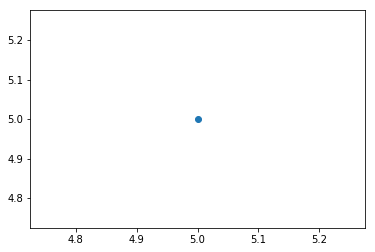

In [5]:
# basic plotting using Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(5, 5, 'o')
plt.show()

#plot gets generated in the browser itself and not a seperate window
#if plot gets generated in a seperate window, then we can enforce generating plots within the browser
#using magic function, ie, %matplotlib inline. inline is passed as the backend
# matplotlib has a number of backends available. FOr the inline backend, you cannot modify the
# figure once it is rendered. This can be solved by using the notebook backend
#Using this backend, we can add titles even after the figure is rendered.

#matplotlib has compatibility with pandas and we can just use the plot() function on
#the pandas dataframe for plotting. Ex india_china_df["India"].plot(kind = hist)
#this plots a histogram for indian immigrants data


In [6]:
#Dataset on immigration to Canada. Canada is also know as 'The Great White North'

import numpy as np
import pandas as pd
from __future__ import print_function #Adds compatibility to python 2


In [7]:
df_can = pd.read_excel(
    'Canada.xlsx',
     sheet_name = "Canada by Citizenship",
     skiprows = range(20),
     skip_footer = 2)

In [8]:
df_can.head() #To see the first five rows

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
#Line Plot
#Data points connected by straight line segments. Data points are called markers
#Generally used when we have a continious data and we want to plot it with time
df_can = df_can.drop(['Type', 'Coverage','AREA','REG','DEV'], axis=1)
df_can.head()


,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [11]:
df_can['Total'] = df_can.sum(axis=1)

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
'''
years = list(map(str, range(1980, 2014)))

haiti = df_can.loc['Haiti', years]
haiti.plot()
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()
'''

"\nyears = list(map(str, range(1980, 2014)))\n\nhaiti = df_can.loc['Haiti', years]\nhaiti.plot()\nplt.title('Immigration from Haiti')\nplt.ylabel('Number of immigrants')\nplt.xlabel('Years')\n\nplt.show()\n"

### Visualization tools

In [14]:
#Area Plot
#Used to represent cumulated totals using numbers or percentages.
#Generally used to compare two or more quantities

#Sorting according to number of immigrants in descending order
df_can.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_can.set_index('Country', inplace=True)

In [15]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [16]:
#Notice how the above line of code returned False when we tested if all the 
#column labels are of type string. So let's change them all to string type.

df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [17]:
#Now, we want to year on x -aixs and annual immigrtion data on y axis for which, we need to 
#use the transpose function

years = list(map(str, range(1980, 2014)))
print(years)
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Matplotlib version:  2.1.2


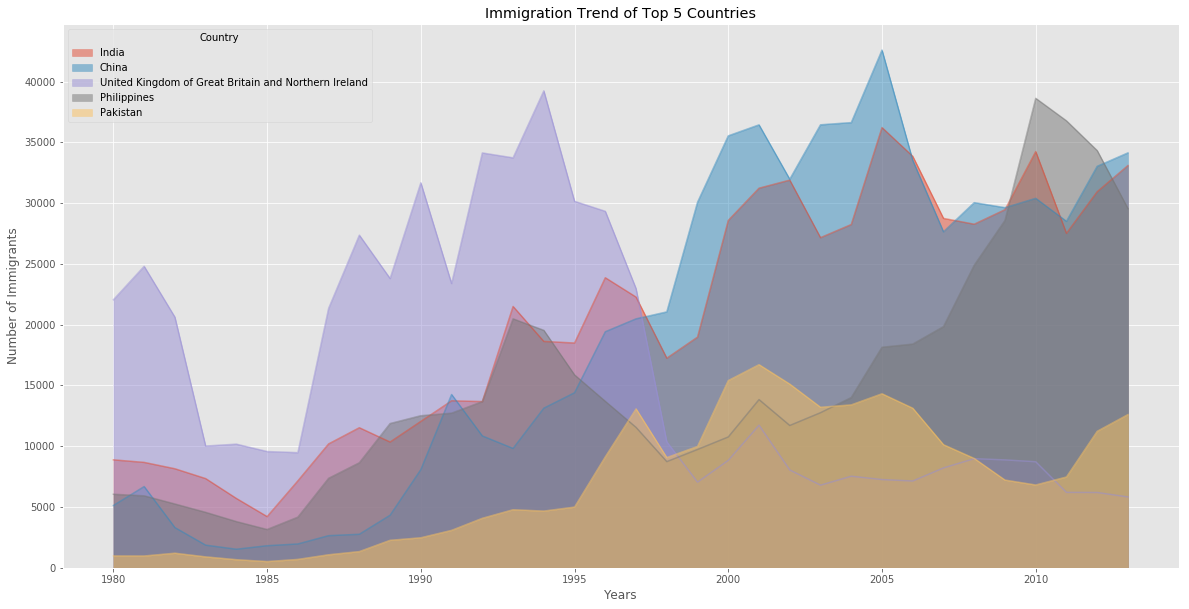

In [18]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [19]:
#Histograms
#it's a way of representing numeric data in a dataset. It's a way of representing the
# frequency distribution of a variable.
df_can = df_can = pd.read_excel(
    'Canada.xlsx',
     sheet_name = "Canada by Citizenship",
     skiprows = range(20),
     skip_footer = 2)

df_can['Total'] = df_can.sum(axis=1)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.set_index('Country', inplace=True)

df_can.head()




,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


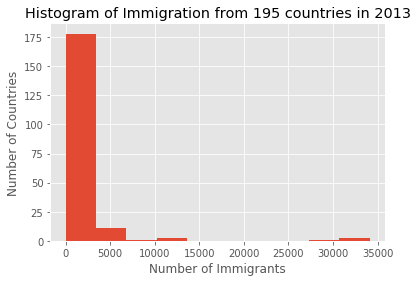

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_can.columns = list(map(str, df_can.columns))

df_can['2013'].plot(kind = 'hist')

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

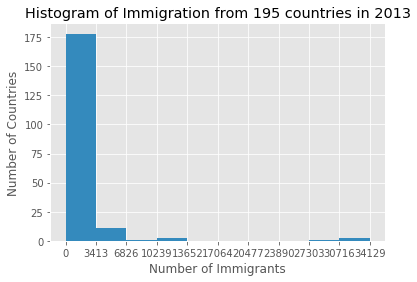

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', xticks = bin_edges)
df_can['2013'].plot(kind = 'hist')

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

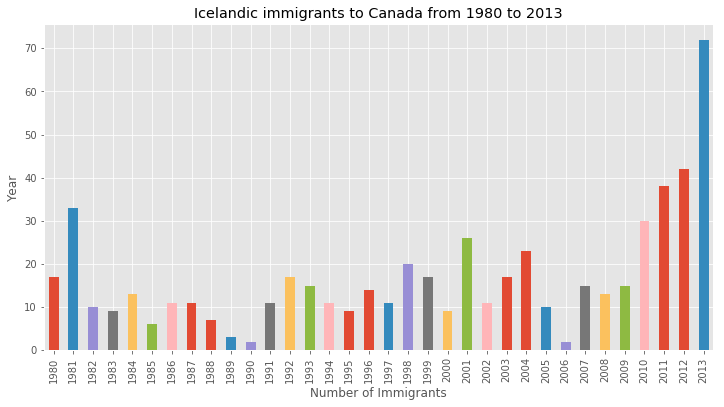

In [22]:
# Bar Chart
#It is commonly used to compare the values of a variable at a given point in time

import matplotlib as mpl
import matplotlib.pyplot as plt

years = list(map(str, range(1980, 2014)))

df_iceland = df_can.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(12,6))

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.ylabel('Year')
plt.xlabel('Number of Immigrants')

plt.show()


In [23]:
df_can = df_can.drop(['Type', 'Coverage','AREA','REG','DEV'], axis=1)

In [24]:
# Pie Charts

# It is used to illustrate numerical proportions

#Grouping by continents
df_continents = df_can.groupby('Continent', axis = 0).sum()
df_continents


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,93736


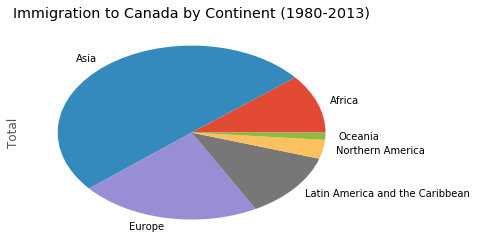

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_continents['Total'].plot(kind='pie')

plt.title('Immigration to Canada by Continent (1980-2013)')

plt.show()

Many people argue that bar charts are more better in representing data in a consistent way as compared to pie charts.

#### Box Plot

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.


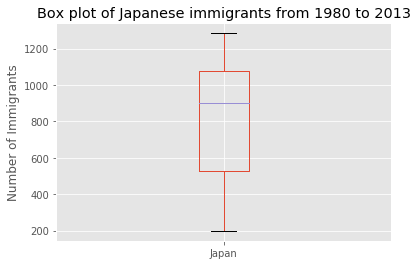

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_can.columns = list(map(str, df_can.columns))

years = list(map(str, range(1980, 2014)))
df_japan = df_can.loc[['Japan'], years].transpose()

df_japan.plot(kind='box')

plt.title('Box plot of Japanese immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()


We can immediately make a few key observations from the plot above:
1. The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2. 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
2. 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [27]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [28]:
# Scatter Plot
#It's a plot which displays values pertaining to two variables against each other.
#Usually it's a dependent variable plotted against an independent variable, plotted to
# see if any co-relation exists.

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


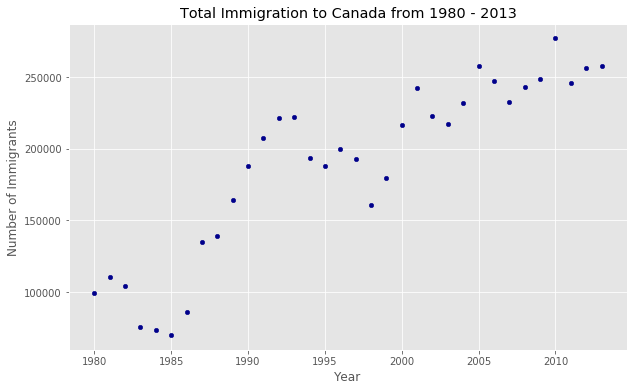

In [29]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [30]:
import numpy as np

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

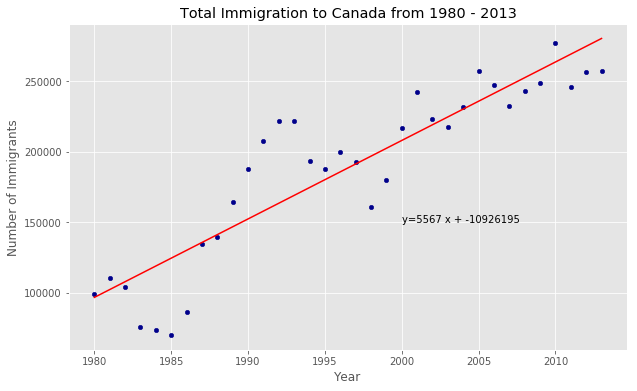

'No. Immigrants = 5567 * Year + -10926195'

In [31]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

### Advanced Visualization Tools


### Waffle Charts

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.


### Word Clouds

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


In [32]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')


Wordcloud is installed and imported!


In [34]:
# open the file and read it into a variable alice_novel
alice_novel = open('alice.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [35]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [36]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

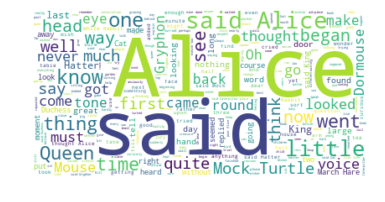

In [37]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

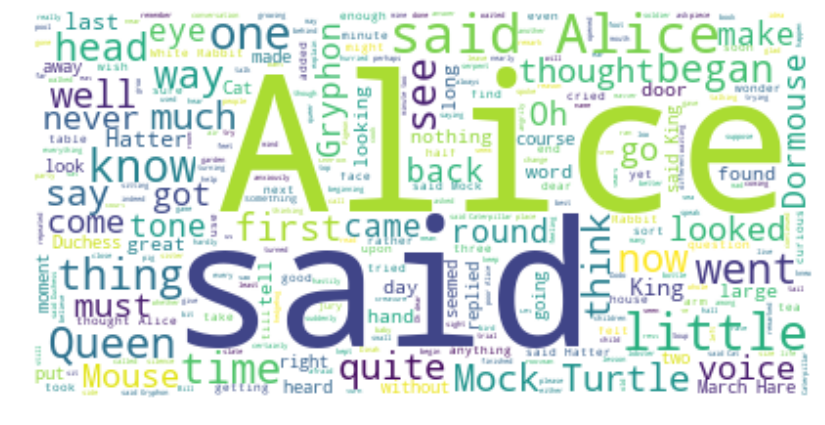

In [38]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
from PIL import Image
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


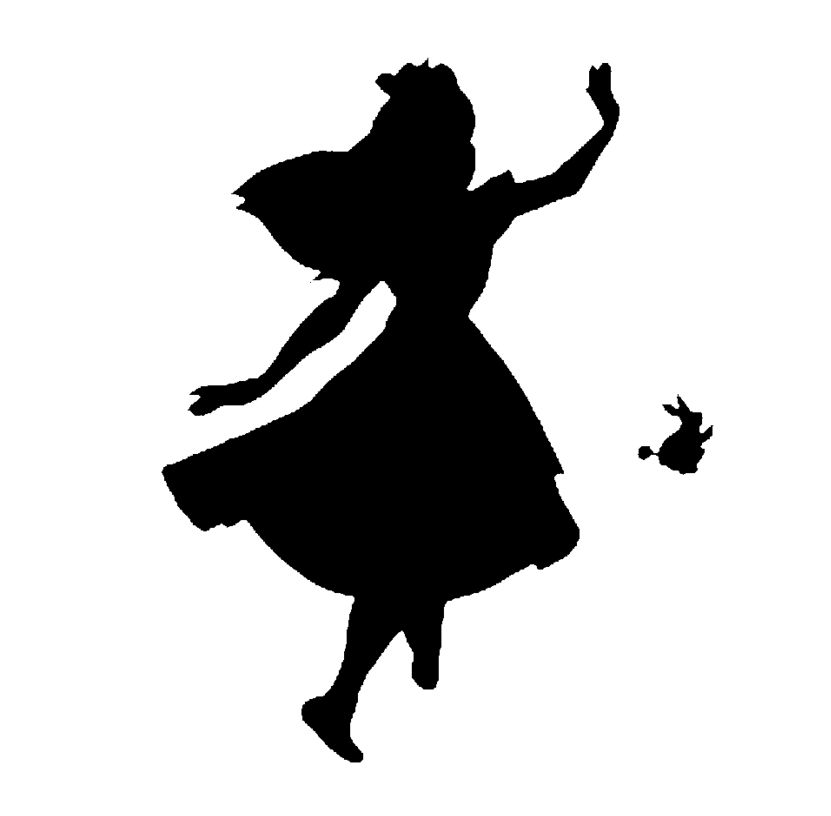

In [40]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

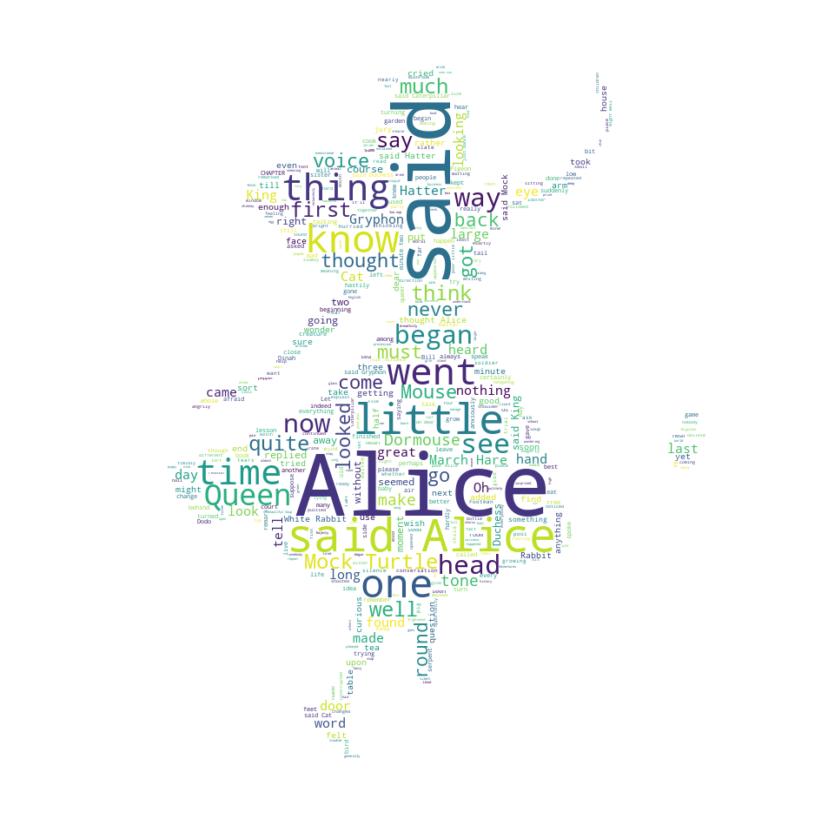

In [41]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()